# Generalization with OOP: The SMABacktester Class

## Using the SMABacktester Class

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn")

In [2]:
df = pd.read_csv("../original/forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
df

,AUDEUR=X,EURUSD=X,USDGBP=X
Date,,,
2004-01-01,0.59780,1.258194,0.56016
2004-01-02,0.60314,1.258194,0.55751
2004-01-05,0.60467,1.268698,0.55334
2004-01-06,0.60350,1.272103,0.54906
2004-01-07,0.60728,1.264095,0.55012
...,...,...,...
2020-06-24,0.61349,1.131235,0.79841
2020-06-25,0.60938,1.125087,0.80561
2020-06-26,0.61373,1.122208,0.80480


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4295 entries, 2004-01-01 to 2020-06-30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AUDEUR=X  4274 non-null   float64
 1   EURUSD=X  4275 non-null   float64
 2   USDGBP=X  4287 non-null   float64
dtypes: float64(3)
memory usage: 134.2 KB


In [3]:
import SMABacktester as SMA

In [40]:
tester = SMA.SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30")
# tester = SMA.SMABacktester("USDGBP=X", 50, 200, "2004-01-01", "2020-06-30")
# tester = SMA.SMABacktester("AUDEUR=X", 50, 200, "2004-01-01", "2020-06-30")

In [41]:
tester

SMABacktester(symbol = EURUSD=X, SMA_S = 50, SMA_L = 200, start = 2004-01-01, end = 2020-06-30)

In [42]:
tester.test_strategy()

(1.2835, 0.367674)

In [43]:
tester.results

,price,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,0.001475,1.221840,1.226081,-1,-0.001475,1.001476,0.998526
2004-10-08,1.241003,0.008982,1.222628,1.225995,-1,-0.008982,1.010511,0.989598
2004-10-11,1.238405,-0.002095,1.223352,1.225843,-1,0.002095,1.008396,0.991673
2004-10-12,1.232104,-0.005102,1.223888,1.225643,-1,0.005102,1.003265,0.996746
2004-10-13,1.234903,0.002270,1.224466,1.225497,-1,-0.002270,1.005545,0.994486
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.101794,1.103430,-1,-0.002892,0.921130,1.271272
2020-06-25,1.125087,-0.005449,1.102486,1.103540,-1,0.005449,0.916125,1.278218
2020-06-26,1.122208,-0.002562,1.103213,1.103627,-1,0.002562,0.913781,1.281497


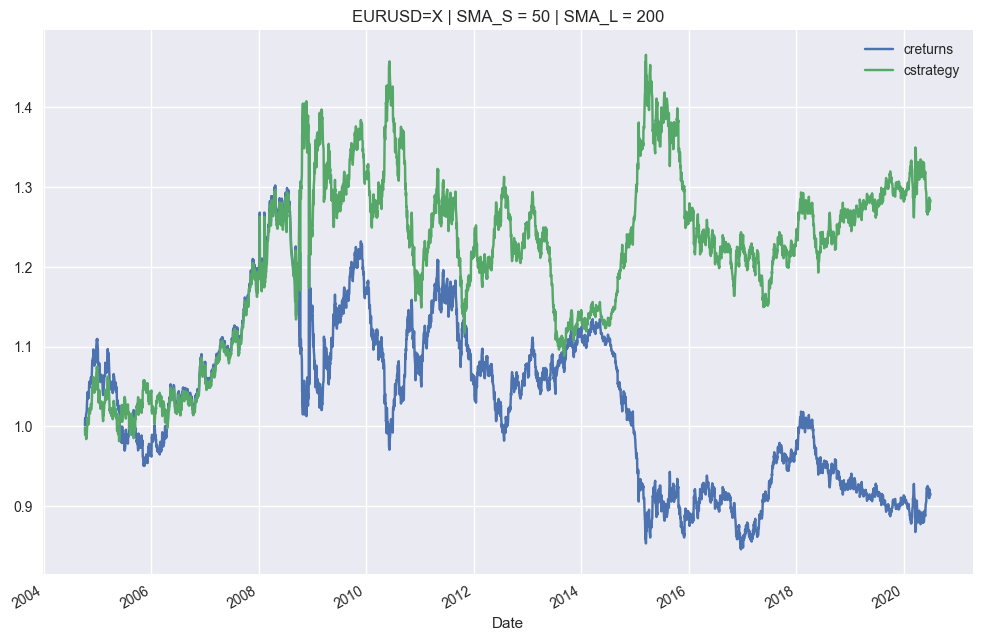

In [44]:
tester.plot_results()

In [45]:
tester.set_parameters(22, 100)

In [46]:
tester.test_strategy()

(1.165483, 0.228524)

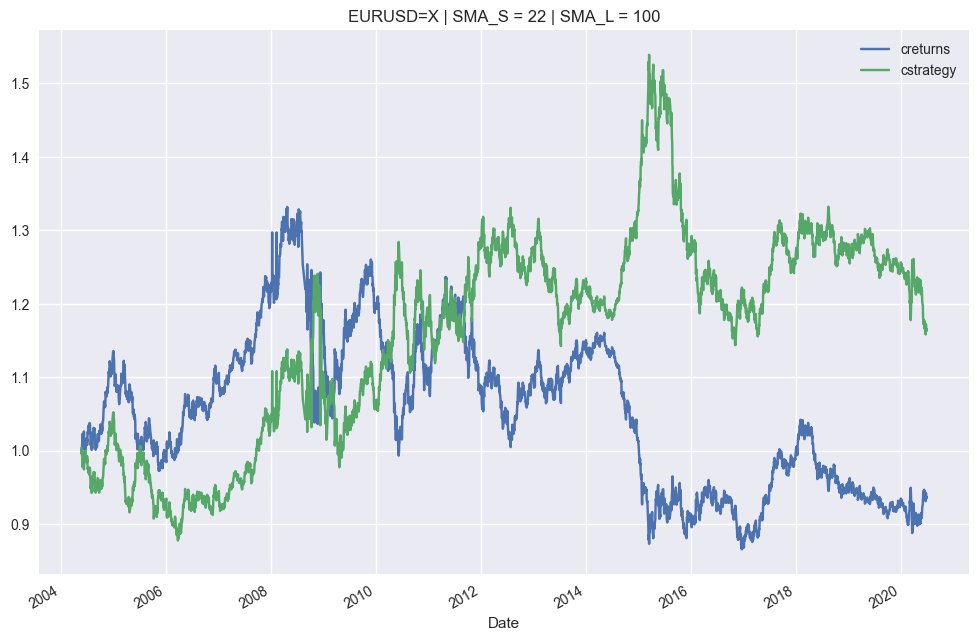

In [47]:
tester.plot_results()

In [48]:
tester.optimize_parameters((25, 50, 1), (100, 200, 1))

(array([ 46., 137.]), 2.526694)

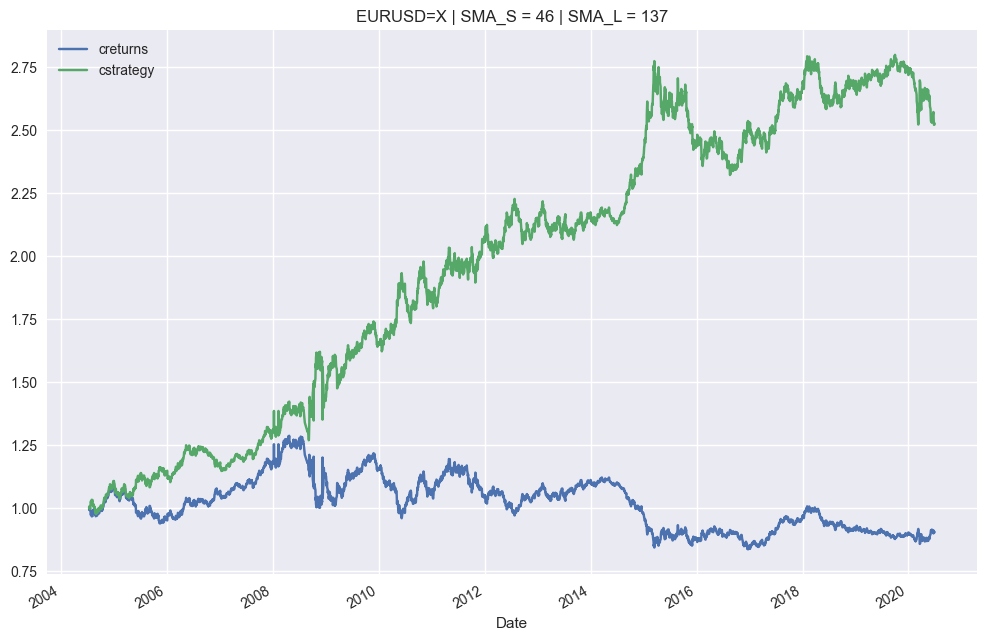

In [49]:
tester.plot_results()

__Backtesting & Forward Testing__

In [50]:
train = SMA.SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2015-12-31")

In [51]:
train.optimize_parameters((25, 50, 1), (100, 200, 1)) # optimizing strategy & backtesting ("in-sample")

(array([ 46., 137.]), 2.440535)

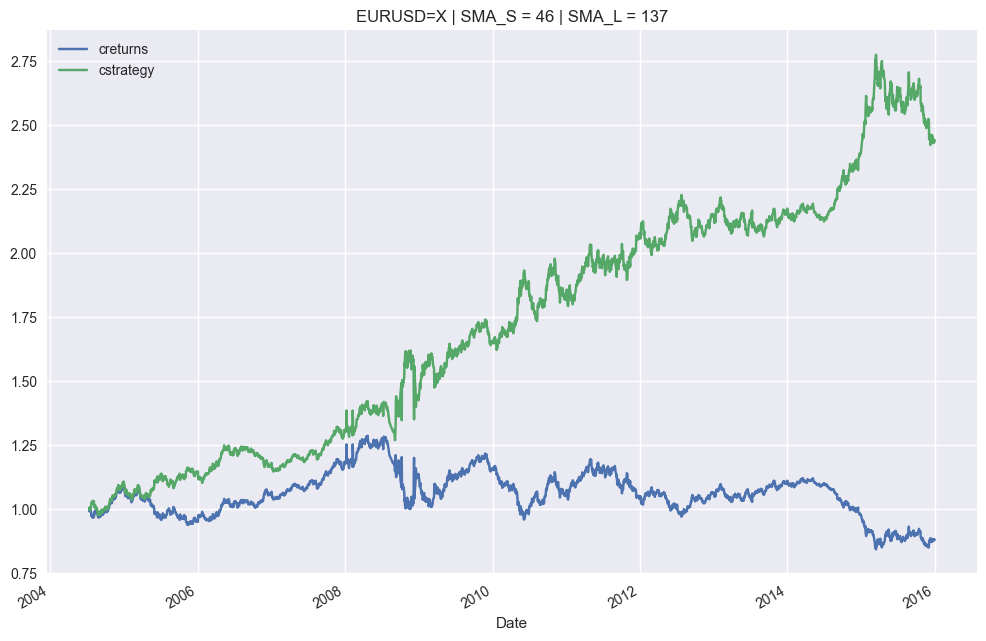

In [52]:
train.plot_results()

In [53]:
tester = SMA.SMABacktester("EURUSD=X", 46, 137, "2016-01-01", "2020-06-30")

In [54]:
tester.test_strategy() # forward testing ("out-sample")

(1.056731, 0.038331)

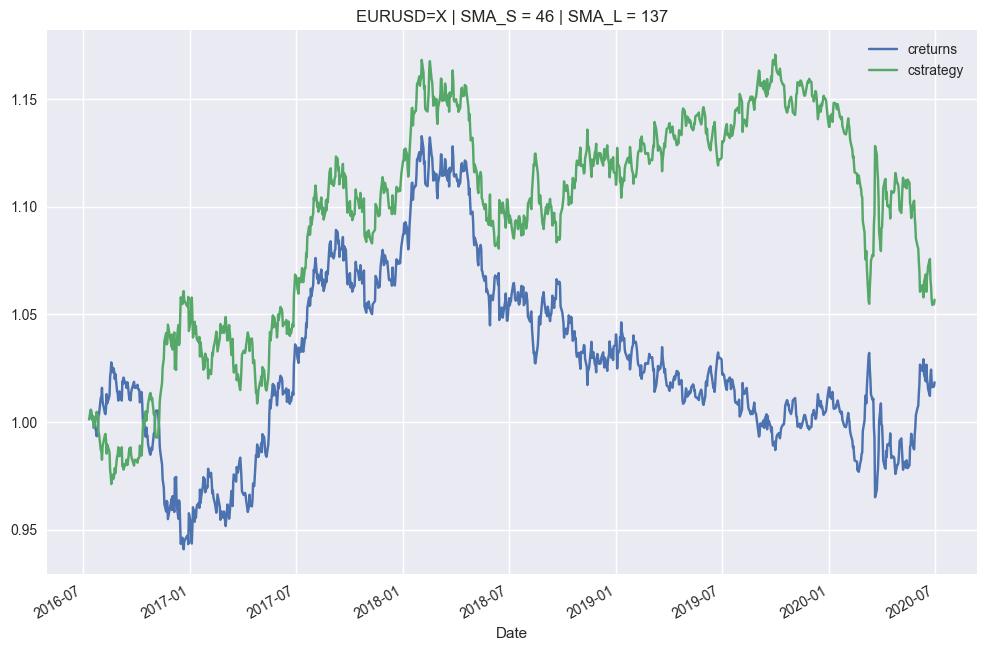

In [55]:
tester.plot_results()

In [56]:
tester = SMA.SMABacktester("AUDEUR=X", 50, 200, "2004-01-01", "2020-06-30")

In [57]:
tester.test_strategy()

(1.145599, 0.106464)

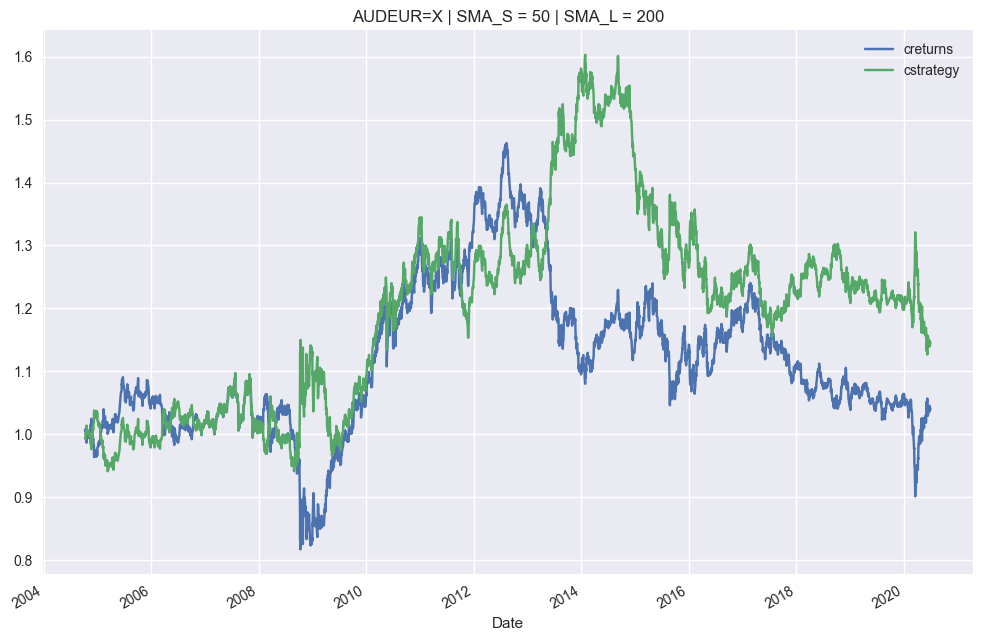

In [58]:
tester.plot_results()

In [59]:
tester.optimize_parameters((25, 50, 1), (100, 200, 1))

(array([ 33., 197.]), 1.457339)

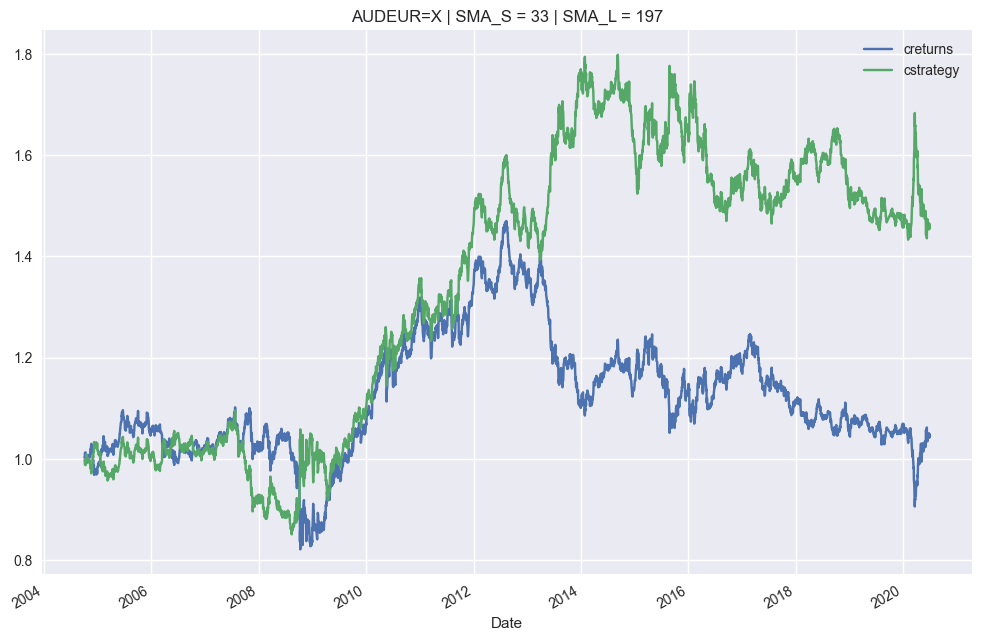

In [60]:
tester.plot_results()

## Building the SMABacktester Class from scratch: Instantiation

In [ ]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None

In [ ]:
tester = SMA.SMABacktester("AUDEUR=X", 50, 200, "2004-01-01", "2020-06-30")

In [ ]:
tester.symbol

In [ ]:
tester.SMA_L

In [ ]:
tester.results

## Method get_data()

In [ ]:
raw = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date") # importing data
raw

In [ ]:
raw = raw["AUDEUR=X"].to_frame().dropna() # selecting an instrument
raw

In [ ]:
raw = raw.loc["2010-01-01":"2012-12-31"].copy() # setting time period 
raw

In [ ]:
raw.rename(columns={"AUDEUR=X": "price"}, inplace=True) # clean up

In [ ]:
raw

In [ ]:
raw["returns"] = np.log(raw / raw.shift(1)) # calculate log returns

In [ ]:
raw["SMA_S"] = raw["price"].rolling(50).mean() # add short sma
raw["SMA_L"] = raw["price"].rolling(200).mean() # add long sma

In [ ]:
raw

In [ ]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        
    def get_data(self):
        raw = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean() # add short sma
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    

In [ ]:
tester = SMABacktester("AUDEUR=X", 50, 200, "2010-01-01", "2019-12-31")

In [ ]:
tester.data

In [ ]:
tester.get_data()

## Setting new SMA Paramters

In [ ]:
tester.SMA_S

In [ ]:
tester.SMA_L

In [ ]:
tester.data.isna().sum()

In [ ]:
tester.SMA_L = 250

In [ ]:
tester.SMA_L

In [ ]:
tester.data.isna().sum()

In [ ]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        
    def get_data(self):
        raw = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean() # add short sma
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()

In [ ]:
tester = SMABacktester("AUDEUR=X", 50, 200, "2010-01-01", "2019-12-31")

In [ ]:
tester.data.isna().sum()

In [ ]:
tester.set_parameters(SMA_S = 25, SMA_L = 150)

In [ ]:
tester.SMA_S

In [ ]:
tester.data.isna().sum()

## Testing a Strategy

In [ ]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        
    def get_data(self):
        raw = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean() # add short sma
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        perf = data["cstrategy"].iloc[-1] # absolute performance
        outperf = perf - data["creturns"].iloc[-1] # outperformance 
        return round(perf, 6), round(outperf, 6)

In [ ]:
tester = SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30")

In [ ]:
tester.test_strategy()

In [ ]:
tester.data

In [ ]:
tester.results

## Plotting the results

In [ ]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        
    def get_data(self):
        raw = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean() # add short sma
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        perf = data["cstrategy"].iloc[-1] # absolute performance
        outperf = perf - data["creturns"].iloc[-1] # outperformance 
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))

In [ ]:
tester = SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30")

In [ ]:
tester.plot_results()

In [ ]:
tester.test_strategy()

In [ ]:
tester.plot_results()

## Optimization (Part 1)

In [ ]:
tester.set_parameters(25, 150)

In [ ]:
tester.test_strategy()

In [ ]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        
    def get_data(self):
        raw = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean() # add short sma
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        perf = data["cstrategy"].iloc[-1] # absolute performance
        outperf = perf - data["creturns"].iloc[-1] # outperformance 
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
            
    def update_and_run(self, SMA):
        self.set_parameters(int(SMA[0]), int(SMA[1]))
        return -self.test_strategy()[0]

In [ ]:
tester = SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30")

In [ ]:
tester.test_strategy()

In [ ]:
tester.update_and_run((25, 150))

## Optimization (Part 2)

In [ ]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        
    def get_data(self):
        raw = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean() # add short sma
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        perf = data["cstrategy"].iloc[-1] # absolute performance
        outperf = perf - data["creturns"].iloc[-1] # outperformance 
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
            
    def update_and_run(self, SMA):
        self.set_parameters(int(SMA[0]), int(SMA[1]))
        return -self.test_strategy()[0]
    
    def optimize_parameters(self, SMA_S_range, SMA_L_range):
        opt = brute(self.update_and_run, (SMA_S_range, SMA_L_range), finish=None)
        return opt, -self.update_and_run(opt)

In [ ]:
tester = SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30")

In [ ]:
tester.test_strategy()

In [ ]:
tester.optimize_parameters((10, 50, 1), (100, 252, 1))

## String Representation & Docstrings

In [ ]:
tester

In [ ]:
#tester.optimize_parameters()

In [ ]:
class SMABacktester():
    ''' Class for the vectorized backtesting of SMA-based trading strategies.

    Attributes
    ==========
    symbol: str
        ticker symbol with which to work with
    SMA_S: int
        time window in days for shorter SMA
    SMA_L: int
        time window in days for longer SMA
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval
        
        
    Methods
    =======
    get_data:
        retrieves and prepares the data
        
    set_parameters:
        sets one or two new SMA parameters
        
    test_strategy:
        runs the backtest for the SMA-based strategy
        
    plot_results:
        plots the performance of the strategy compared to buy and hold
        
    update_and_run:
        updates SMA parameters and returns the negative absolute performance (for minimization algorithm)
        
    optimize_parameters:
        implements a brute force optimization for the two SMA parameters
    '''
    
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
    
    def __repr__(self):
        rep = "SMABacktester(symbol = {}, SMA_S = {}, SMA_L = {}, start = {}, end = {})"
        return rep.format(self.symbol, self.SMA_S, self.SMA_L, self.start, self.end)  
    
    def get_data(self):
        ''' Retrieves and prepares the data.
        '''
        raw = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean() # add short sma
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        ''' Updates SMA parameters and resp. time series.
        '''
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        ''' Backtests the trading strategy.
        '''
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        perf = data["cstrategy"].iloc[-1] # absolute performance
        outperf = perf - data["creturns"].iloc[-1] # outperformance 
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the cumulative performance of the trading strategy compared to buy and hold.
        '''
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
            
    def update_and_run(self, SMA):
        ''' Updates SMA parameters and returns the negative absolute performance (for minimization algorithm).

        Parameters
        ==========
        SMA: tuple
            SMA parameter tuple
        '''
        self.set_parameters(int(SMA[0]), int(SMA[1]))
        return -self.test_strategy()[0]
    
    def optimize_parameters(self, SMA_S_range, SMA_L_range):
        ''' Finds global maximum given the SMA parameter ranges.

        Parameters
        ==========
        SMA_S_range, SMA_L_range: tuple
            tuples of the form (start, end, step size)
        '''
        opt = brute(self.update_and_run, (SMA_S_range, SMA_L_range), finish=None)
        return opt, -self.update_and_run(opt)

In [ ]:
tester = SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30")

In [ ]:
tester

In [ ]:
tester.optimize_parameters()

## Adding Transaction Costs to SMABacktester

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn")

In [7]:
class SMABacktester(): # with ptc 
    ''' Class for the vectorized backtesting of SMA-based trading strategies.

    Attributes
    ==========
    symbol: str
        ticker symbol with which to work with
    SMA_S: int
        time window in days for shorter SMA
    SMA_L: int
        time window in days for longer SMA
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval
    tc: float
        proportional transaction costs per trade
        
        
    Methods
    =======
    get_data:
        retrieves and prepares the data
        
    set_parameters:
        sets one or two new SMA parameters
        
    test_strategy:
        runs the backtest for the SMA-based strategy
        
    plot_results:
        plots the performance of the strategy compared to buy and hold
        
    update_and_run:
        updates SMA parameters and returns the negative absolute performance (for minimization algorithm)
        
    optimize_parameters:
        implements a brute force optimization for the two SMA parameters
    '''
    
    def __init__(self, symbol, SMA_S, SMA_L, start, end, tc):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None 
        self.get_data()
        
    def __repr__(self):
        return "SMABacktester(symbol = {}, SMA_S = {}, SMA_L = {}, start = {}, end = {})".format(self.symbol, self.SMA_S, self.SMA_L, self.start, self.end)
        
    def get_data(self):
        ''' Retrieves and prepares the data.
        '''
        raw = pd.read_csv("../original/forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean()
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        
    def set_parameters(self, SMA_S = None, SMA_L = None):
        ''' Updates SMA parameters and resp. time series.
        '''
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        ''' Backtests the trading strategy.
        '''
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        
        # determine when a trade takes place
        data["trades"] = data.position.diff().fillna(0).abs()
        
        # subtract transaction costs from return when trade takes place
        data.strategy = data.strategy - data.trades * self.tc
        
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        perf = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["creturns"].iloc[-1] # out-/underperformance of strategy
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the cumulative performance of the trading strategy
        compared to buy and hold.
        '''
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {} | TC = {}".format(self.symbol, self.SMA_S, self.SMA_L, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
        
    def update_and_run(self, SMA):
        ''' Updates SMA parameters and returns the negative absolute performance (for minimization algorithm).

        Parameters
        ==========
        SMA: tuple
            SMA parameter tuple
        '''
        self.set_parameters(int(SMA[0]), int(SMA[1]))
        return -self.test_strategy()[0]
    
    def optimize_parameters(self, SMA1_range, SMA2_range):
        ''' Finds global maximum given the SMA parameter ranges.

        Parameters
        ==========
        SMA1_range, SMA2_range: tuple
            tuples of the form (start, end, step size)
        '''
        opt = brute(self.update_and_run, (SMA1_range, SMA2_range), finish=None)
        return opt, -self.update_and_run(opt)

In [5]:
ptc = 0.00007

In [ ]:
tester = SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30", ptc)

In [ ]:
tester.test_strategy()

In [ ]:
tester.optimize_parameters((25, 50, 1), (100, 200, 1))

## Special Case: Price/SMA Crossover

__Price == SMA1__

In [8]:
tester = SMABacktester("EURUSD=X", 1, 200, "2004-01-01", "2020-06-30", ptc)

In [9]:
tester.test_strategy()

(1.418575, 0.502749)

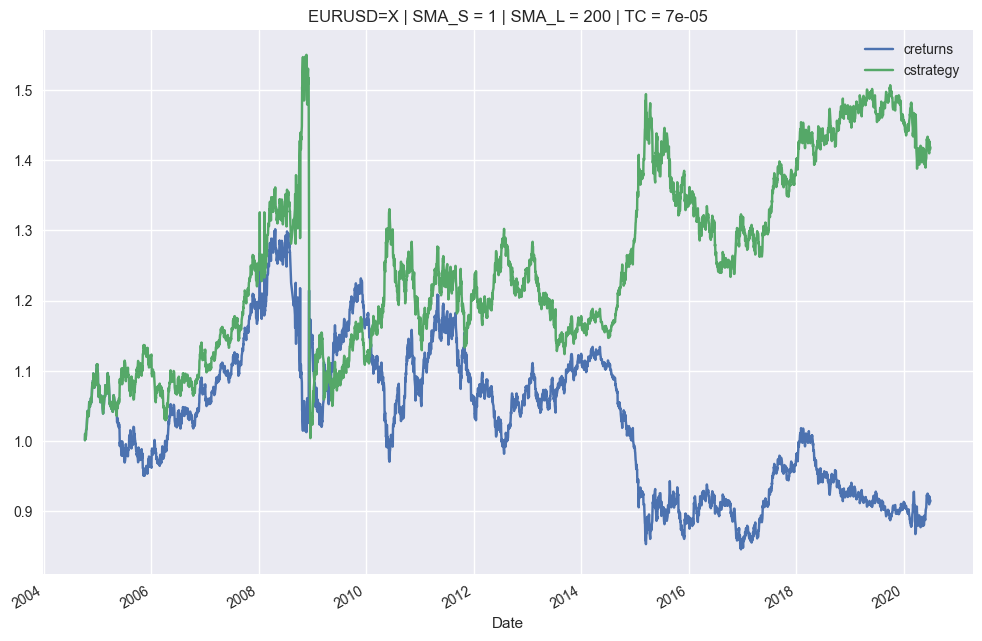

In [10]:
tester.plot_results()

In [11]:
tester.data

,price,returns,SMA_S,SMA_L
Date,,,,
2004-01-01,1.258194,NaN,1.258194,NaN
2004-01-02,1.258194,0.000000,1.258194,NaN
2004-01-05,1.268698,0.008313,1.268698,NaN
2004-01-06,1.272103,0.002681,1.272103,NaN
2004-01-07,1.264095,-0.006315,1.264095,NaN
...,...,...,...,...
2020-06-24,1.131235,0.002892,1.131235,1.103430
2020-06-25,1.125087,-0.005449,1.125087,1.103540
2020-06-26,1.122208,-0.002562,1.122208,1.103627


In [16]:
tester.optimize_parameters((1, 5, 1), (50, 200, 1))

(array([  4., 182.]), 1.896172)